# Métodos Numéricos 2024 

## Guía 2: 2024-04-04 - Solución de ecuaciones de una variable

In [1]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("LaTeXStrings")
Pkg.add("Plots")
using DataFrames
using Plots
using LaTeXStrings
using DataFrames # Recuerde instalar este paquete ingresando en una celda: using Pkg; Pkg.add("DataFrames")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Crayons ───────────────────── v4.1.1
   Installed SentinelArrays ────────────── v1.4.1
   Installed DataAPI ───────────────────── v1.16.0
   Installed PooledArrays ──────────────── v1.4.3
   Installed InlineStrings ─────────────── v1.4.0
   Installed TableTraits ───────────────── v1.0.1
   Installed Tables ────────────────────── v1.11.1
   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed DataValueInterfaces ───────── v1.0.0
   Installed InvertedIndices ───────────── v1.3.0
   Installed Reexport ──────────────────── v1.2.2
   Installed LaTeXStrings ──────────────── v1.3.1
   Installed OrderedCollections ────────── v1.6.3
   Installed DataStructures ────────────── v0.18.19
   Installed DataFrames ────────────────── v1.6.1
   Installed PrettyTables ──────────────── v2.3.1
   Installed Compat ────────────────────── v4.14.0
   Installed Missings ──────────────────── v1.2.0
  

### Problema 1

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el **método de la bisección**.
El programa debe tomar como datos de entrada:

* la función $f:\mathbb{R}\to \mathbb{R}$, 

* el intervalo inicial $[a,b]$, 

* la máxima tolerancia permitida $\varepsilon_x$ al error relativo $(p-x)/x$ de la aproximación $p$ de la raíz $x$ de $f$ en $[a,b]$,

* la máxima tolerancia permitida $\varepsilon_f$ al valor de $|f(p)|$,

* y el número máximo $n_{\max}$ de iteraciones permitidas.

El programa debe retornar una tupla con las siguientes componentes:

* un booleano indicando si el algoritmo convergió o no dentro de las tolerancias máximas permitidas $\varepsilon_x$ y $\varepsilon_f$,

* un vector de componentes $p_i$ que representan las aproximaciones a la raíz $x$ obtenidas por el algoritmo en sucesivas iteraciones $i=1,2,...,n$,

* un vector de componentes $f_i=f(p_i)$,

* un vector de componentes $c_i=|b_i-a_i|/2$ que representan cotas de los errores absolutos $|x-p_i|$,

* y un vector de componentes $r_i=c_i/|p_i|$ que representan estimaciones de los errores relativos $|x-p_i|/|x|$.

El programa debe deternerse si se cumple:

$$
(r_i<\varepsilon_x \;\; \text{AND} \;\; |f_i|<\varepsilon_f) \;\; \text{OR} \;\; i=n_{\max}
$$

El programa debe trabajar con números de precisión suficientemente alta como para obtener resultados con 12 cifras significativas en los reales (ej. `Float64`).

Con el programa desarrollado, Ud. debe:

1. Encontrar una aproximación a $\sqrt{3}$ con un error (relativo en $x$ y absoluto en $y$) menor a $10^{-5}$. Para ello: 

    * Note que $\sqrt{3}$ es la raíz positiva de la ecuación $f(x)=x^2-3$.
    * Grafique $f(x)$ vs $x$ en el intervalo $[1,2]$ para determinar que tiene una raíz allí.
    * Utilice el programa desarrollado para calcular los vectores de aproximaciones y errores.
    * Imprima una lista con los valores $i$, $p_i$, $f_i$, $c_i$ y $r_i$ para $i=1,...,n$, utilizando el paquete `DataFrames`.
    * Grafique $p_i$ vs $i$ usando puntos (en vez de una línea contínua).
    * Grafique $|f_i|$ vs $i$ usando puntos, escala logarítmica en el eje $y$ y lineal en el eje $x$.
    * En una misma figura, grafique con puntos de un color los errores absolutos $c_i$ vs $i$ y con puntos de otro color los errores relativos $r_i$ vs $i$, utilizando escala logarítimica en el eje $y$ y lineal en el eje $x$. 
    * Responda: 
        * Cuanto vale la presunta mejor aproximación $p_n$? 
        * Cuántas iteraciones fueron necesarias?
        * Cuales son los valores exactos de los errores absoluto y relativo que se obtienen de comparando el resultado $p_n$ con el "analítico"?   
    
2. Encontrar la menor solución positiva de la ecuación $g(x)=\tan(x)-2x$ con un error relativo en $x$ y absoluto en $y$ menor a $10^{-5}$. Para ello, repita lo realizado en el inciso anterior considerando el intérvalo $x\in [0.8,1.4]$, pero exceptuando el último item ya que no podemos calcular el valor analítico en este caso. 

**IMPORTANTE:** Recuerde poner títulos, etiquetas a los ejes y leyendas para las curvas o puntos de los gráficos.

In [2]:
#PROGRAMA 1
#la función f:ℝ→ℝ
#el intervalo inicial [a,b]
#la máxima tolerancia permitida εx al error relativo (p−x)/x de la aproximación p de la raíz x de f en [a,b]
#la máxima tolerancia permitida εf al valor de |f(p)|
#y el número máximo nmax de iteraciones permitidas.


function biseccion(f,intervalo,e_x=1e-5,e_f=1e-5,n_max=100)
    a,b = intervalo
    @assert a<=b
    fa = f(a)
    @assert fa*f(b) < 0
    vect_pi = zeros(n_max) #vector de aprox de p_i
    vect_f = zeros(n_max) #vector de valores de f(p_i)
    vect_eabs = zeros(n_max) #vector de estim de errores absolutos de x
    vect_erel = zeros(n_max) #vector de estim de errores relativos de x
    
    for i in 1:n_max
        p_i =((b-a)/2) + a 
        f_pi = f(p_i)
        error_abs = (b-a)/2 #estimacion error abs
        error_rel = abs(error_abs/p_i)
        
        vect_pi[i]= p_i
        vect_f[i]= f_pi
        vect_eabs[i] = error_abs
        vect_erel[i] = error_rel
        
         if error_abs <= e_x && abs(f_pi) <= e_f
            return true,vect_pi[1:i],vect_f[1:i],vect_eabs[1:i],vect_erel[1:i] 
        end
        if fa*f_pi < 0.0
            b = p_i
        else
            a = p_i  
        end
    end
    return false,vect_pi,vect_f,vect_eabs,vect_erel
end   
            
    

biseccion (generic function with 4 methods)

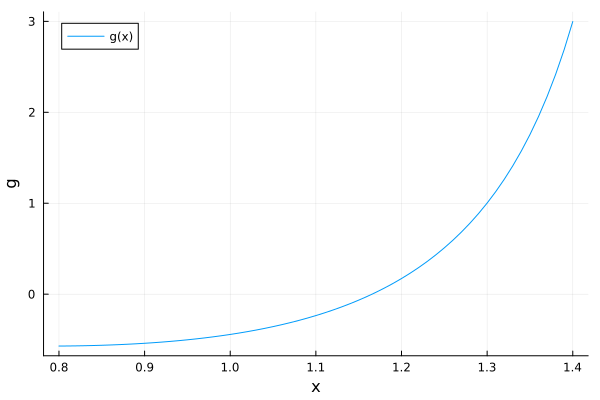

In [6]:
g(x) = x^2-3
g(x)= tan(x)-2x

plot(g,0.8:0.01:1.4,xlabel ="x",ylabel = "g", label = "g(x)")

In [7]:
conv,vect_pi,vect_f,vect_eabs,vect_erel = biseccion(g,[0.8,1.4])
data = DataFrame(p_i = vect_pi, f_i= vect_f,error_abs = vect_eabs,error_rel = vect_erel)

Row,p_i,f_i,error_abs,error_rel
,Float64,Float64,Float64,Float64
1,1.1,-0.23524,0.3,0.272727
2,1.25,0.50957,0.15,0.12
3,1.175,0.0432212,0.075,0.0638298
4,1.1375,-0.113383,0.0375,0.032967
5,1.15625,-0.0400159,0.01875,0.0162162
6,1.16562,0.000283024,0.009375,0.0080429
7,1.16094,-0.020185,0.0046875,0.00403769
8,1.16328,-0.010032,0.00234375,0.00201478
9,1.16445,-0.00489492,0.00117188,0.00100637


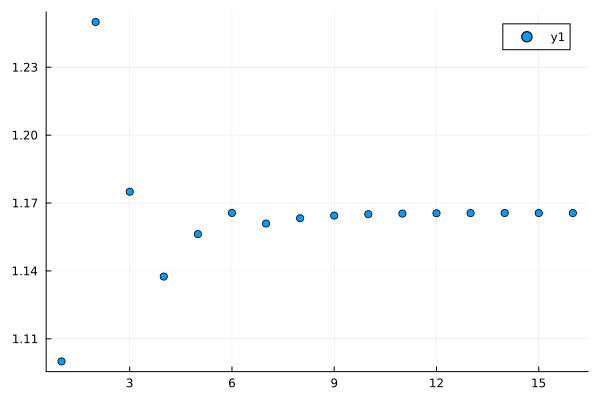

In [8]:
n = length(vect_pi)
scatter(1:n,i->abs(vect_pi[i]),yscale =:identity)

### Problema 2

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el **método de Newton** (también conocido como Newton-Raphson).
El programa debe tomar como datos de entrada la función $f:\mathbb{R}\to \mathbb{R}$, su derivada $f':\mathbb{R}\to \mathbb{R}$, una estimación inicial $p_1$ de la raíz $x$, la tolerancia $\varepsilon_x$ a la estimación $r_i:=\frac{|p_{i+1} - p_{i}|}{|p_{i+1}|}$ del error relativo $|x-p_i|/|x|$ en la iteración $i$ para $i=1,2,...,n$, la tolerancia en $\varepsilon_f$ al valor absoluto de $f_i:=f(p_{i})$ y el número máximo de iteraciones permitido $n_{\max}$.
El programa debe retornar una tupla con las siguientes componentes:

* Un booleano indicando si el algoritmo convergió.

* Un vector de componentes $p_i$ para $i=1,2,...,n$, donde $n$ es el número de iteraciones realizado por el programa.

* Un vector de valores $f_i:=f(p_i)$.

* Un vector de estimaciones $c_i:=|p_{i+1}-p_i|$ de errores absolutos $|x-p_i|$.

* Un vector de estimaciones $r_i:=c_i/|p_{i+1}|$ de errores relativos $|x-p_i|/|x|$.

El programa debe finalizar en la iteración $n$-ésima que satisfaga por vez primera:
$$
\left( r_n < \varepsilon_x \qquad \text{AND} \qquad 
f_n < \varepsilon_f \right) \qquad \text{OR} \qquad
n = n_{\max}
$$
y debe poder utlizar 13 cifras significativas para las variables reales (ej. `Float64`).

Utilice este programa para resolver los **incisos 1 y 2** del **problema 1**, usando $p_1=1$ en ambos casos. No hace falta graficar $f(x)$ vs $x$. Compare la cantidad de iteraciones $n$, la cantidad de evaluaciones de la función $f$ y su derivada $f'$ en los dos métodos.

In [9]:

function newton(f,df,p0,e_x=1e-5,e_f=1e-5,n_max = 100)
    vec_pi = zeros(n_max) #vector aprox pi
    vec_f = zeros(n_max) #vector de valores f(pi)
    vec_df = zeros(n_max) #vector de valores de derivadas de f en pi
    vec_ri = zeros(n_max) #vector de estimaciones de error rel
    vec_ci = zeros(n_max) #vector de estimaciones de error rel
    
    fp = f(p0)
    dfp = df(p0)
    
    for i in 1:n_max
        pi = p0 - (fp/dfp) #calculo nuevo pi
        fp = f(pi) 
        dfp = df(pi)
        ci = abs((pi)-p0) #estimo error abs 
        ri = ci/abs(pi)
# Ahora guardo datos obtenidos en vectores definidos anteriormente
        vec_pi[i] = pi
        vec_f[i] = fp
        vec_ri[i] = ri
        vec_ci[i] = ci

         if ri <= e_x && ci <= e_f
            return true,vec_pi[1:i],vec_f[1:i],vec_df[1:i],vec_ci[1:i],vec_ri[1:i] 
        else 
            p0 = pi
        end
    end 
    return false,vec_pi,vec_f,vec_df,vec_ci,vec_ri
end 

f(x)= tan(x) - 2x
df(x) = sec(x)^2 - 2

newton(f,df,1,1e-5,1e-5,100)
        
    

(true, [1.3104780300916217, 1.2239290964998213, 1.1760509000038353, 1.1659265083113628, 1.1655616363485986, 1.1655611852078998], [1.133327685248926, 0.31852867701817456, 0.048207117932219656, 0.001621894244293376, 2.000423291459441e-6, 3.0526692285093304e-12], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.31047803009162167, 0.08654893359180038, 0.047878196495986014, 0.010124391692472479, 0.00036487196276424605, 4.5114069879836904e-7], [0.23691967584524457, 0.07071400936484969, 0.040710990056493195, 0.008683559058225598, 0.0003130439020859463, 3.8705878723809733e-7])

In [10]:
conv,vec_pi,vec_f,vec_df,vec_ci,vec_ri = newton(f,df,1)
data = DataFrame(p_i = vec_pi, f_i = vec_f,error_abs = vec_ci,error_rel = vec_ri)

Row,p_i,f_i,error_abs,error_rel
,Float64,Float64,Float64,Float64
1,1.31048,1.13333,0.310478,0.23692
2,1.22393,0.318529,0.0865489,0.070714
3,1.17605,0.0482071,0.0478782,0.040711
4,1.16593,0.00162189,0.0101244,0.00868356
5,1.16556,2.00042e-6,0.000364872,0.000313044
6,1.16556,3.05267e-12,4.51141e-7,3.87059e-7


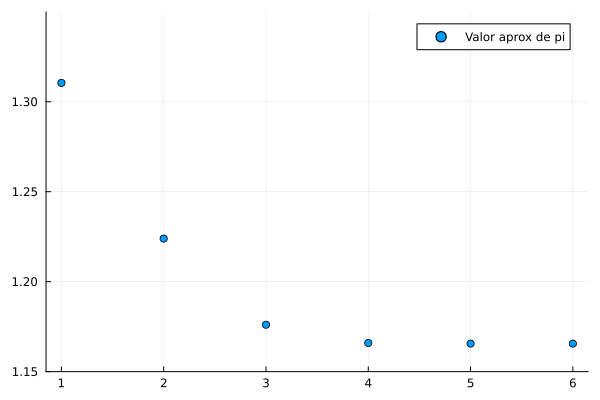

In [11]:
f(x)= tan(x) - 2x
df(x) = sec(x)^2 - 2

n = length(vec_pi)
scatter(1:n,i->abs(vec_pi[i]),yscale =:identity,ylims = (1.15,1.35),label = "Valor aprox de pi")

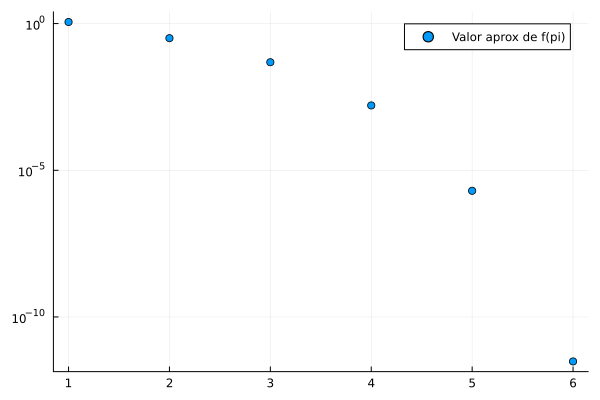

In [12]:
j = length(vec_f)
scatter(1:j,i->abs(vec_f[i]),yscale =:log10, label = "Valor aprox de f(pi)")

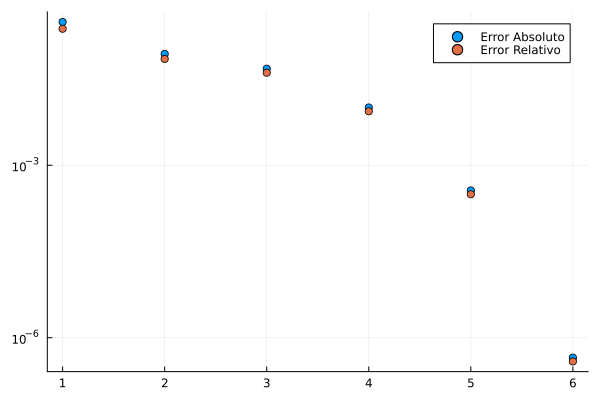

In [13]:
k = length(vec_ci)
scatter(1:k,i->abs(vec_ci[i]),yscale =:log10,label = "Error Absoluto")
scatter!(1:k,i->abs(vec_ri[i]),yscale =:log10, label = "Error Relativo")

### Problema 3

Compute y grafique en escala log-lineal el error relativo estimado $r_i:=|p_{i+1}-p_i|/|p_{i+1}|$ vs $i$ de las aproximaciones de $\sqrt{3}$ con los métodos de la **bisección** y **Newton**, partiendo del intervalo $[0,2.5]$ y del valor inicial $p_1=2.5$, respectivamente. 
Utilice en ambos casos tolerancias $\varepsilon_x=\varepsilon_f=10^{-10}$.

In [14]:
z(x) = x^2 - 3
dz(x) = 2x

#Calculo de Newton
conv,vec_pi,vec_f,vec_df,vec_ci,vec_ri = newton(z,dz,2.5,1e-10,1e-10)
data = DataFrame(p_i = vec_pi, f_i = vec_f,error_abs = vec_ci,error_rel = vec_ri)


Row,p_i,f_i,error_abs,error_rel
,Float64,Float64,Float64,Float64
1,1.85,0.4225,0.65,0.351351
2,1.73581,0.0130392,0.114189,0.0657844
3,1.73205,1.4107e-5,0.00375593,0.00216848
4,1.73205,1.65841e-11,4.07234e-6,2.35116e-6
5,1.73205,-4.44089e-16,4.7875e-12,2.76407e-12


In [15]:
#Calculo de Biseccion
conv,vect_pi,vect_f,vect_eabs,vect_erel = biseccion(z,[0,2.5],1e-10,1e-10)
data = DataFrame(p_i = vect_pi, f_i= vect_f,error_abs = vect_eabs,error_rel = vect_erel)

Row,p_i,f_i,error_abs,error_rel
,Float64,Float64,Float64,Float64
1,1.25,-1.4375,1.25,1.0
2,1.875,0.515625,0.625,0.333333
3,1.5625,-0.558594,0.3125,0.2
4,1.71875,-0.0458984,0.15625,0.0909091
5,1.79688,0.22876,0.078125,0.0434783
6,1.75781,0.0899048,0.0390625,0.0222222
7,1.73828,0.0216217,0.0195312,0.011236
8,1.72852,-0.0122337,0.00976562,0.00564972
9,1.7334,0.00467014,0.00488281,0.0028169


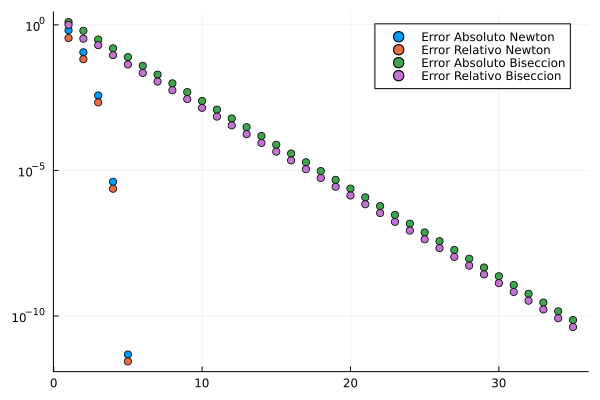

In [16]:
k = length(vec_ci)
n = length(vect_eabs)
#Grafico de Newton
scatter(1:k,i->abs(vec_ci[i]),yscale =:log10,label = "Error Absoluto Newton")
scatter!(1:k,i->abs(vec_ri[i]),yscale =:log10, label = "Error Relativo Newton")
#Grafico de Biseccion
scatter!(1:n,i->abs(vect_eabs[i]),yscale =:log10,label = "Error Absoluto Biseccion")
scatter!(1:n,i->abs(vect_erel[i]),yscale =:log10, label = "Error Relativo Biseccion")

### Problema 4

Un objeto en caída vertical en el aire está sujeto a la fuerza de gravedad y a la resistencia del aire. Si un objeto de masa $m$ es dejado caer desde una altura $h_0$, su altura luego de $t$ segundos está dada por:
$$
h(t) = h_0 - \frac{mg}{k} t + \frac{m^2 g}{k^2} \left( 1 - e^{-kt/m}\right)
$$
donde $g=9.8\, m/s^2$ y $k$ representa el coeficiente de resistencia del aire en $kg / s$.
Suponga que $h_0 = 10\,m$, $m=0.1\,kg$, y $k=0.149\,kg/s$.

Grafique $h(t)$ para analizar su comportamiento.

Encuentre, con una precisión de $0.01\,s$, el tiempo que le toma a este objeto llegar al suelo. 
Utilice el método de **bisección** y el de **Newton**.

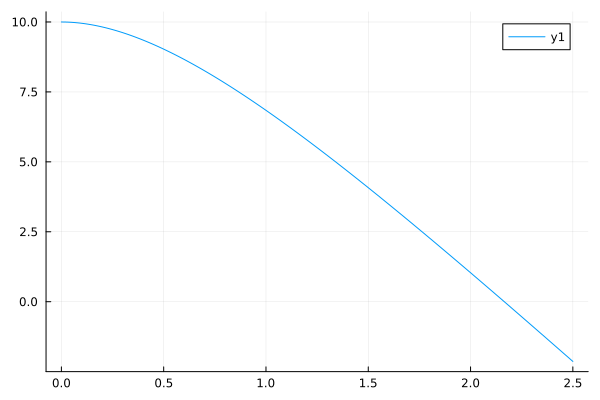

In [17]:
h0 = 10
m = 0.1
k = 0.149
v = 9.8

h(t) = h0 -(((m*v)/k)*t) + (((m^2*v)/(k^2))*(1-ℯ^(-k*t/m)))
dh(t)= -(((m*v)/k))+(((m*v)/k)*(ℯ^(-k*t/m)))

plot(h,0:0.01:2.5)

In [18]:
#Calculo de Newton
conv,vec_pi,vec_f,vec_df,vec_ci,vec_ri = newton(h,dh,2,0.01,1e-10)
data = DataFrame(p_i = vec_pi, f_i = vec_f,error_abs = vec_ci,error_rel = vec_ri)

Row,p_i,f_i,error_abs,error_rel
,Float64,Float64,Float64,Float64
1,2.16589,-0.00631777,0.165886,0.0765903
2,2.16489,-1.9457e-7,0.00100024,0.000462028
3,2.16489,-8.88178e-16,3.08066e-8,1.42301e-8
4,2.16489,-8.88178e-16,0.0,0.0


In [19]:
#Calculo de Biseccion
conv,vect_pi,vect_f,vect_eabs,vect_erel = biseccion(h,[2.1,2.2],0.01,1e-20)
data = DataFrame(p_i = vect_pi, f_i= vect_f,error_abs = vect_eabs,error_rel = vect_erel)

Row,p_i,f_i,error_abs,error_rel
,Float64,Float64,Float64,Float64
1,2.15,0.0939715,0.05,0.0232558
2,2.175,-0.0639018,0.025,0.0114943
3,2.1625,0.0150654,0.0125,0.00578035
4,2.16875,-0.0244107,0.00625,0.00288184
5,2.16563,-0.00467075,0.003125,0.001443
6,2.16406,0.00519778,0.0015625,0.000722022
7,2.16484,0.000263632,0.00078125,0.000360881
8,2.16523,-0.00220353,0.000390625,0.000180408
9,2.16504,-0.000969942,0.000195313,9.0212e-5


In [20]:
#Vemos como con Newton converge en 4 iteraciones y con biseccion no termina escapando cuando llegamos a la cantidad de iteraciones maxima, 
#Aunque el reusltado en ambos sea similar, vemos como biseccion tarda mucho mas
Pkg.add("BenchmarkTools")
using BenchmarkTools

   Resolving package versions...
   Installed BenchmarkTools ─ v1.5.0
    Updating `~/.julia/environments/v1.10/Project.toml`
  [6e4b80f9] + BenchmarkTools v1.5.0
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.5.0
  [9abbd945] + Profile
Precompiling project...
  ✓ BenchmarkTools
  1 dependency successfully precompiled in 1 seconds. 170 already precompiled.


In [21]:
@benchmark biseccion(h,[2,2.2],0.01,1e-20)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  38.157 μs …   9.654 ms  ┊ GC (min … max): 0.00% … 98.60%
 Time  (median):     41.015 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   51.305 μs ± 147.685 μs  ┊ GC (mean ± σ):  6.07% ±  2.39%

  ▇█▇▃▁   ▃▆▆▅▃▃▃▂▁▁▁▁▁▁▁▁▁  ▁                                 ▂
  ██████████████████████████████████▆▇▆▇█▇▇▇▇▇▇▆▆▆▆▅▆▅▅▄▄▅▄▄▄▅ █
  38.2 μs       Histogram: log(frequency) by time       109 μs <

 Memory estimate: 35.25 KiB, allocs estimate: 2032.

In [22]:
@benchmark newton(h,dh,2,0.01,1e-10)

BenchmarkTools.Trial: 10000 samples with 7 evaluations.
 Range (min … max):  4.123 μs … 581.474 μs  ┊ GC (min … max): 0.00% … 97.53%
 Time  (median):     4.502 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   5.500 μs ±  13.315 μs  ┊ GC (mean ± σ):  6.99% ±  2.90%

  ▃▆██▆▄▃▂▁▁       ▁▃▄▅▅▃▂▂▁▁▁                                ▂
  ██████████▇▇▇▇▆▇████████████▇▇▇▆▇▆▇▇▆▆▄▆▆▆▆▆▇▆▅▆▅▅▅▅▄▅▅▄▅▄▅ █
  4.12 μs      Histogram: log(frequency) by time      10.4 μs <

 Memory estimate: 7.55 KiB, allocs estimate: 183.

### Problema 5

Encuentre la solución a la ecuación 
$$
x - \cos x = 0 
$$
en el intervalo $[0, \pi/2]$ con un error relativo $\varepsilon_x=10^{-10}$ utilizando:

1. el método de la **secante** con $p_1=0.0$ y $p_2=\pi/2$,

2. el método de **regula falsi** con $a=0.0$ y $b=\pi/2$,

3. el método de **bisección** con $a=0.0$ y $b=\pi/2$ y

4. el método de **Newton** con $p_1=1$.

Graficar el error relativo $r_i$ retornado por cada método vs el número de iteración $i$. Utilice las escalas log-lineal (es decir, logarítmica en el eje $y$ y lineal en el $x$).

In [91]:
function secante(f,intervalo,e_x=1e-5,e_f=1e-5,n_max=100)
    a,b = intervalo
    @assert a<=b
    vec_pi2 = zeros(n_max) #vector de aprox de p_i
    vec_f2 = zeros(n_max) #vector de valores de f(p_i)
    vec_ci2 = zeros(n_max) #vector de estim de errores absolutos de x
    vec_ri2 = zeros(n_max) #vector de estim de errores relativos de x
    
    for i in 1:n_max
        pi = b - ((f(b)*(b-a))/(f(b)-f(a)))
        fp = f(pi)
        ci = (b-a)/2 #estimacion error abs
        ri = abs(ci/pi)
        
        vec_pi2[i]= pi
        vec_f2[i]= fp
        vec_ci2[i] = ci
        vec_ci2[i] = ri
        
         if ci <= e_x && abs(f(pi)) <= e_f
            return true,vec_pi2[1:i],vec_f2[1:i],vec_ci2[1:i],vec_ci2[1:i]
        else
            a = b
            b = pi
            
        end
    end
    return false,vec_pi2,vec_f2,vec_ci2,vec_ri2
end   

secante (generic function with 4 methods)

In [86]:
function regula(f,intervalo,e_x=1e-5,e_f=1e-5,n_max=100)
    a,b = intervalo
    @assert a<=b
    fa = f(a)
    fb = f(b)
    @assert fa*fb < 0
    p = abs(a+b)/2
    vec_p1 = zeros(n_max) #vector de aprox de p_i
    vec_f1 = zeros(n_max) #vector de valores de f(p_i)
    vec_ci1 = zeros(n_max) #vector de estim de errores absolutos de x
    vec_ri1 = zeros(n_max) #vector de estim de errores relativos de x
    vec_a = zeros(n_max)
    for i in 1:n_max
        pv = p
        p = a -(fa*(b-a)/(fb-fa)) 
        fp = f(p)
        #ci = abs(b-a) #estimacion error abs
        ci = (p-pv)
        ri = abs(ci/p)
        
        vec_p1[i]= p
        vec_f1[i]= fp
        vec_ci1[i] = ci
        vec_ri1[i] = ri
        vec_a[i] = a
        
         if ci < e_x && abs(fp) < e_f 
            return true,vec_p1[1:i],vec_f1[1:i],vec_ci1[1:i],vec_ri1[1:i],vec_a[1:i]
        end
        if fa*fp <= 0.0
            b = p 
            fb = fp
        else
            a = p
            fa = fp
        end
    end
    return false,vec_p1,vec_f1,vec_ci1,vec_ri1,vec_a
end               

regula (generic function with 4 methods)

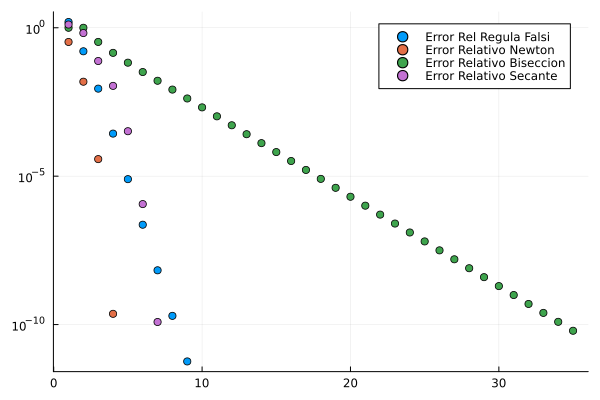

In [93]:
g(x) = x-cos(x)
dg(x) = 1+sin(x)

#Grafico Regula Falsi
conv,vec_p1,vec_f1,vec_ci1,vec_ri1,vec_a = regula(g,[0.01,pi],1e-10,1e-10)

n = length(vec_ri1)

scatter(1:n,i->abs(vec_ri1[i]),yscale =:log10,label = "Error Rel Regula Falsi")

k = length(vec_ci)
n = length(vect_eabs)


#Grafico de Newton
conv,vec_pi,vec_f,vec_df,vec_ci,vec_ri = newton(g,dg,1)

scatter!(1:k,i->abs(vec_ri[i]),yscale =:log10, label = "Error Relativo Newton")
#Grafico de Biseccion

conv,vect_pi,vect_f,vect_eabs,vect_erel = biseccion(g,[0,pi/2],1e-10,1e-10)

scatter!(1:n,i->abs(vect_erel[i]),yscale =:log10, label = "Error Relativo Biseccion")
#Grafico de Secante

conv,vec_pi2,vec_f2,vec_ci2,vec_ri2 = secante(g,[0,pi/2],1e-10,1e-10)

l = length(vec_ri2)
scatter!(1:l,i->abs(vec_ri2[i]),yscale =:log10, label = "Error Relativo Secante")

#data = DataFrame(p_i = vec_pi2, f_i = vec_f2,error_abs = vec_ci2,error_rel = vec_ri2)

### Problema 6

Dado el siguiente polinomio, $p(x) = -10 + 5 x - 12 x^2  + 6 x^3  - 2 x^4  + x^5$.

Grafique y observe que posee una única raíz real positiva. Encuentre la misma utilizando:

1. El método de bisección. Elija el intervalo $[a,b]$ utilizando el **teorema de las cotas de Cauchy** que acota la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio utilizando el **algoritmo de Horner**.

2. El método de Newton-Raphson. Elija el valor inicial utilizando los teoremas que acotan la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio y su derivada utilizando el **algoritmo de Horner**.

In [24]:
q = 11
-10+(5*q)-(12*q^2)+(6*q^3)-(2*q^4)+1*q^5

138348

In [25]:

function Horner(A,x)
    c = 0.0
    largo = length(A)
    for i in largo:-1:2
        c = (c+A[i])*x
    end 
    return c+A[1]
end 


Horner (generic function with 1 method)

In [34]:
#Cauchy 
B = A/A[length(A)]

M = maximum(abs.(B))+1
intervalo = [-M,M]
f(q)=-10+(5*q)-(12*q^2)+(6*q^3)-(2*q^4)+1*q^5



f (generic function with 1 method)

In [35]:
function biseccion_horner(A,intervalo,e_x=1e-5,e_f=1e-5,n_max=100)
    a,b = intervalo
    @assert a<=b
    fa = Horner(A,a)
    fb = Horner(A,b)
    @assert fa*f(b) < 0
    vect_pi = zeros(n_max) #vector de aprox de p_i
    vect_f = zeros(n_max) #vector de valores de f(p_i)
    vect_eabs = zeros(n_max) #vector de estim de errores absolutos de x
    vect_erel = zeros(n_max) #vector de estim de errores relativos de x
    
    for i in 1:n_max
        p_i =((b-a)/2) + a 
        f_pi = Horner(A,p_i)
        error_abs = (b-a)/2 #estimacion error abs
        error_rel = abs(error_abs/p_i)
        
        vect_pi[i]= p_i
        vect_f[i]= f_pi
        vect_eabs[i] = error_abs
        vect_erel[i] = error_rel
        
         if error_abs <= e_x && abs(f_pi) <= e_f
            return true,vect_pi[1:i],vect_f[1:i],vect_eabs[1:i],vect_erel[1:i] 
        end
        if fa*f_pi < 0.0
            b = p_i
        else
            a = p_i  
        end
    end
    return false,vect_pi,vect_f,vect_eabs,vect_erel
end   

A = [-10,5,-12,6,-2,1]

biseccion_horner(A,intervalo)


(true, [0.0, 6.5, 3.25, 1.625, 2.4375, 2.03125, 1.828125, 1.9296875, 1.98046875, 2.005859375  …  2.00030517578125, 1.999908447265625, 2.0001068115234375, 2.0000076293945312, 1.9999580383300781, 1.9999828338623047, 1.999995231628418, 2.0000014305114746, 1.9999983310699463, 1.9999998807907104], [-10.0, 9196.03125, 224.9267578125, -10.431243896484375, 33.22757625579834, 1.4618606865406036, -6.225567604415119, -2.8974416454148013, -0.8577663014193604, 0.26560052682870605  …  0.013738126415388408, -0.0041194036833189784, 0.00480715747853111, 0.00034332601354769565, -0.0018881765449272336, -0.0007724596945699602, -0.00021457544790060012, 6.43731309537543e-5, -7.510169643865083e-5, -5.364417233977292e-6], [13.0, 6.5, 3.25, 1.625, 0.8125, 0.40625, 0.203125, 0.1015625, 0.05078125, 0.025390625  …  0.00079345703125, 0.000396728515625, 0.0001983642578125, 9.918212890625e-5, 4.9591064453125e-5, 2.47955322265625e-5, 1.239776611328125e-5, 6.198883056640625e-6, 3.0994415283203125e-6, 1.549720764160156

In [28]:
function derivada_polinomio(A)
    largoB = length(A) -1
    B = zeros(largoB)
    for i in largoB:-1:1
        B[i] = i*A[i+1]
    end
    return B
end
        
B = derivada_polinomio(A)

function newton_horner(A,B,p0,e_x=1e-5,e_f=1e-5,n_max = 100)
    vec_pi = zeros(n_max) #vector aprox pi
    vec_f = zeros(n_max) #vector de valores f(pi)
    vec_df = zeros(n_max) #vector de valores de derivadas de f en pi
    vec_ri = zeros(n_max) #vector de estimaciones de error rel
    vec_ci = zeros(n_max) #vector de estimaciones de error rel
    
    fp = Horner(A,p0)
    dfp = Horner(B,p0)
    
    for i in 1:n_max
        pi = p0 - (fp/dfp) #calculo nuevo pi
        fp = Horner(A,pi) 
        dfp = Horner(B,pi)
        ci = abs((pi)-p0) #estimo error abs 
        ri = ci/abs(pi)
# Ahora guardo datos obtenidos en vectores definidos anteriormente
        vec_pi[i] = pi
        vec_f[i] = fp
        vec_ri[i] = ri
        vec_ci[i] = ci

         if ri <= e_x && ci <= e_f
            return true,vec_pi[1:i],vec_f[1:i],vec_df[1:i],vec_ci[1:i],vec_ri[1:i] 
        else 
            p0 = pi
        end
    end 
    return false,vec_pi,vec_f,vec_df,vec_ci,vec_ri
end 

newton_horner(A,B,1)

(true, [-2.0, -1.3308550185873607, -0.7261928905631974, -0.09347774566137024, 1.3344084426026859, 8.043723674180773, 6.483959329738314, 5.2339167121011325, 4.234945561020507, 3.4438447539298545, 2.832860547288436, 2.39105514057933, 2.121899422912406, 2.0157574053763128, 2.000302235843354, 2.0000001136269714, 2.000000000000016], [-180.0, -62.50053545465978, -23.015177822964837, -10.577306542458384, -12.54944603264611, 27677.183141717534, 9078.929450127705, 2974.5184111211333, 970.5571584338142, 313.05670371897975, 97.90509377596341, 28.1515165762804, 6.373738480696126, 0.7231056772055453, 0.013605729183531423, 5.113214438523528e-6, 7.194245199571014e-13], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 0.6691449814126393, 0.6046621280241633, 0.6327151449018271, 1.427886188264056, 6.7093152315780875, 1.5597643444424598, 1.250042617637181, 0.9989711510806254, 0.7911008070906527, 0.6109842066414184, 0.44180540670910595, 0.26915571766692414, 0.10

**Teorema de las cotas de Cauchy**

Sea $p(x) = a_0 + a_1x + a_2x^2+...+a_nx^n$ un polinomio sobre $\mathbb{C}$ de grado $n\geq 1$ y coeficientes $a_i\in \mathbb{C}$ para $i=0,1,...,n$. Luego, todas las raices de $p$ se encuentran en el intervalo $[-(M+1),M+1]$ para $M = \max\left\{\frac{|a_0|}{|a_n|},\frac{|a_0|}{|a_n|},...,\frac{|a_{n-1}|}{|a_n|}\right\}$.

**Algoritmo de Horner**

Cualquier polinomio
$$
p(x)=a_0+a_1x+a_2x^2+...+a_{n-1}x^{n-1}+a_nx^n
$$
puede ser reescrito como
$$
p(x)=a_0+x(a_1+x(a_2+...+x(a_{n-1}+xa_n)...))
$$
El algoritmo de Horner consiste en calcular $p(x)$ para un valor dado de $x$ sacando ventaja de la anterior expresión, ya que nos evita tener que calcular potencias $x^2, x^3, ..., x^n$ lo cual resulta numericamente costozo y tendiente a introducir errores numéricos indeseables.
Notar que
$$
p'(x)=a_1+2a_2x+3a_3x^2+...+(n-1)a_{n-1}x^{n-2}+na_nx^{n-1}
$$
lo cual se reduce a
$$
p'(x)=a_1+x(2a_2+x(3a_3+...+x((n-1)a_{n-1}+xna_n))+...)))
$$

## Ejercicios Complementarios

### Problema C.1

Cree una función para calcular una aproximación a la raíz cúbica $x=R^{1/3}$ de un número $R$ positivo. La función debe tomar como entrada el número $R$, la aproximación inicial $x_0$, el error máximo permitido $\epsilon$, y debe utilizar el algoritmo de de Newton-Raphson para calcular la raíz. Ponga a prueba la función con $R=40$, $x_0=20$ y $\epsilon=10^{-5}$